In [140]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(7) # fix the random seet for reproducibility

def create_df_with_shift_column(input_df, look_back=1):
    r_df = input_df.copy()
    for i in range(0, look_back):
        r_df['shifted_{}'.format(i+1)] = r_df['p'].shift(i+1)
    r_df = r_df.dropna()
    return r_df[list(set(r_df.columns) - set(list(['p'])))], r_df['p']
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

data_url = '/Users/frhyme/Downloads/international-airline-passengers.csv'
df = pd.read_csv(data_url)[:-1]
df.columns=['m', 'p']
del df['m']

scaler = MinMaxScaler()
df['p'] = df['p'].values.astype('float32')
df['p'] = scaler.fit_transform(df['p'].values.reshape(-1, 1))
# train test set split


reshaping over


reshaping over
fitting start
fitting complete
rmse, train set: 81.8748550415039
rmse, test set: 80.06438446044922


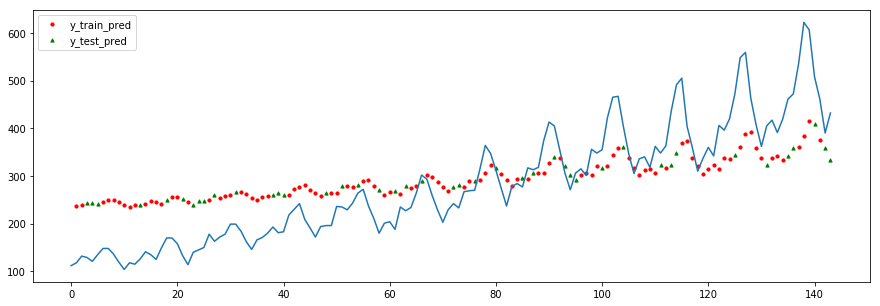

In [141]:
"""

"""
x, y = create_df_with_shift_column(df, look_back=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)
# reshape to (samples, time steps, features)
x_train_reshaped = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
x_test_reshaped = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
print("reshaping over")
## make rnn model 

model = Sequential([
    LSTM(4, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])), 
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')
"""
- cnn 때는 batch_size가 컸는데, 여기서는 일단 1
- 그리고 데이터에 비해서 rnn의 epoch이 매우 큰 편이라는 것을 알 수 이따. 
"""
print("fitting start")
model.fit(x_train_reshaped, y_train, epochs=5, batch_size=1, verbose=0)
print("fitting complete")

x_train_pred = scaler.inverse_transform(model.predict(x_train_reshaped))
x_test_pred = scaler.inverse_transform(model.predict(x_test_reshaped))

y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

print("rmse, train set: {}".format(rmse(y_train, x_train_pred)))
print("rmse, test set: {}".format(rmse(y_test, x_test_pred)))

## plotting 
plt.figure(figsize=(15, 5))
plt.plot(scaler.inverse_transform(df['p'].reshape(-1, 1)))## inverse scaling
plt.scatter(x_train.index, x_train_pred, color='r', marker='o', s=10, label='y_train_pred')
plt.scatter(x_test.index, x_test_pred, color='g', marker='^', s=10, label='y_test_pred')
plt.legend()
#plt.savefig("../../assets/images/markdown_img/180612_1728_rnn_plotting.svg")
plt.show()

reshaping over
fitting start
fitting complete
rmse, train set: 32.19496154785156
rmse, test set: 38.14675521850586


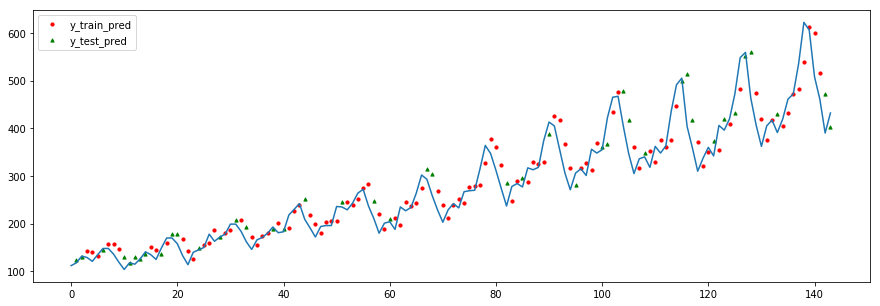

In [142]:
"""

"""
x, y = create_df_with_shift_column(df, look_back=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)
# reshape to (samples, time steps, features)
x_train_reshaped = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
x_test_reshaped = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
print("reshaping over")
## make rnn model 

model = Sequential([
    LSTM(4, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])), 
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')
"""
- cnn 때는 batch_size가 컸는데, 여기서는 일단 1
- 그리고 데이터에 비해서 rnn의 epoch이 매우 큰 편이라는 것을 알 수 이따. 
"""
print("fitting start")
model.fit(x_train_reshaped, y_train, epochs=50, batch_size=1, verbose=0)
print("fitting complete")

x_train_pred = scaler.inverse_transform(model.predict(x_train_reshaped))
x_test_pred = scaler.inverse_transform(model.predict(x_test_reshaped))

y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

print("rmse, train set: {}".format(rmse(y_train, x_train_pred)))
print("rmse, test set: {}".format(rmse(y_test, x_test_pred)))

## plotting 
plt.figure(figsize=(15, 5))
plt.plot(scaler.inverse_transform(df['p'].reshape(-1, 1)))## inverse scaling
plt.scatter(x_train.index, x_train_pred, color='r', marker='o', s=10, label='y_train_pred')
plt.scatter(x_test.index, x_test_pred, color='g', marker='^', s=10, label='y_test_pred')
plt.legend()
#plt.savefig("../../assets/images/markdown_img/180612_1728_rnn_plotting.svg")
plt.show()

reshaping over
fitting start
fitting complete
rmse, train set: 30.659881591796875
rmse, test set: 29.07022476196289


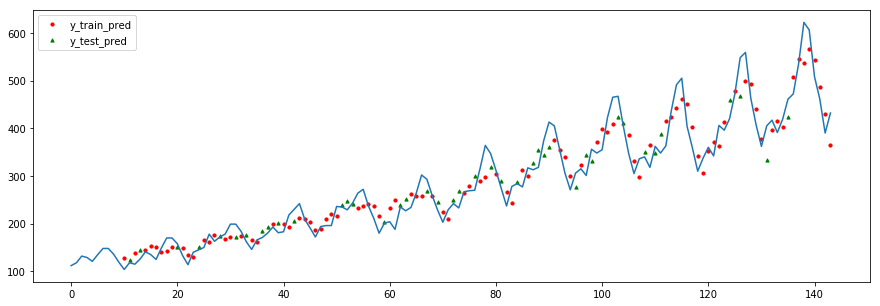

In [143]:
"""

"""
x, y = create_df_with_shift_column(df, look_back=10)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)
# reshape to (samples, time steps, features)
x_train_reshaped = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
x_test_reshaped = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
print("reshaping over")
## make rnn model 

model = Sequential([
    LSTM(4, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])), 
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')
"""
- cnn 때는 batch_size가 컸는데, 여기서는 일단 1
- 그리고 데이터에 비해서 rnn의 epoch이 매우 큰 편이라는 것을 알 수 이따. 
"""
print("fitting start")
model.fit(x_train_reshaped, y_train, epochs=50, batch_size=1, verbose=0)
print("fitting complete")

x_train_pred = scaler.inverse_transform(model.predict(x_train_reshaped))
x_test_pred = scaler.inverse_transform(model.predict(x_test_reshaped))

y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

print("rmse, train set: {}".format(rmse(y_train, x_train_pred)))
print("rmse, test set: {}".format(rmse(y_test, x_test_pred)))

## plotting 
plt.figure(figsize=(15, 5))
plt.plot(scaler.inverse_transform(df['p'].reshape(-1, 1)))## inverse scaling
plt.scatter(x_train.index, x_train_pred, color='r', marker='o', s=10, label='y_train_pred')
plt.scatter(x_test.index, x_test_pred, color='g', marker='^', s=10, label='y_test_pred')
plt.legend()
#plt.savefig("../../assets/images/markdown_img/180612_1728_rnn_plotting.svg")
plt.show()